### Importing libraries and data and renaming columns

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [131]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [132]:
# Importing unemployment_rate.xlsx
data = pd.read_excel(r'/Users/elizabetenakamura/Documents/projects/python/data/original/unemployment_rate.xlsx')

### Cleaning and wrangling data

In [133]:
data.head()

observation_date      NROU
0       1949-01-01  5.255053
1       1949-04-01  5.261516
2       1949-07-01  5.268013
3       1949-10-01  5.274564
4       1950-01-01  5.281182

In [134]:
# Inspecting the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  344 non-null    datetime64[ns]
 1   NROU              344 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.5 KB
None


In [135]:
# Return a Series containing the frequency of each distinct row in the Dataframe.
data.value_counts(dropna = False)

observation_date  NROU    
2034-10-01        4.213503    1
1949-01-01        5.255053    1
1949-04-01        5.261516    1
1949-07-01        5.268013    1
1949-10-01        5.274564    1
                             ..
1955-10-01        5.388586    1
1956-01-01        5.390996    1
1956-04-01        5.393430    1
1956-07-01        5.395917    1
1956-10-01        5.398493    1
Name: count, Length: 344, dtype: int64

In [136]:
data.rename(columns = {'NROU' : 'unemployment_rate'}, inplace = True)

In [137]:
data.head()

observation_date  unemployment_rate
0       1949-01-01           5.255053
1       1949-04-01           5.261516
2       1949-07-01           5.268013
3       1949-10-01           5.274564
4       1950-01-01           5.281182

In [138]:
data.shape

(344, 2)

In [139]:
data.columns

Index(['observation_date', 'unemployment_rate'], dtype='object')

In [140]:
# Checking for null values
print(df.isnull().sum())

observation_date    0
NROU                0
dtype: int64


In [141]:
# Checking for duplicates
duplicates = data[data.duplicated()]
duplicates.value_counts()

Series([], Name: count, dtype: int64)

In [142]:
data['observation_date'].value_counts()

observation_date
2034-10-01    1
1949-01-01    1
1949-04-01    1
1949-07-01    1
1949-10-01    1
             ..
1955-10-01    1
1956-01-01    1
1956-04-01    1
1956-07-01    1
1956-10-01    1
Name: count, Length: 344, dtype: int64

In [143]:
data['unemployment_rate'].value_counts()

unemployment_rate
4.213503    1
5.255053    1
5.261516    1
5.268013    1
5.274564    1
           ..
5.388586    1
5.390996    1
5.393430    1
5.395917    1
5.398493    1
Name: count, Length: 344, dtype: int64

In [144]:
# Check for mixed-type data
for col in data.columns.tolist():
  weird = (data[[col]].map(type) != data[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (data[weird]) > 0:
    print (col)

In [145]:
# Create a subset with the desired columns
data_sub = data[['observation_date', 'unemployment_rate']]

In [146]:
# Group by observation_date with the mean of the average unemployment_rate
data_sub = data_sub.groupby('observation_date')['unemployment_rate'].mean()

In [147]:
data_sub.head()

observation_date
1949-01-01    5.255053
1949-04-01    5.261516
1949-07-01    5.268013
1949-10-01    5.274564
1950-01-01    5.281182
Name: unemployment_rate, dtype: float64

In [148]:
# Turn data_sub_set into data frame
data_sub = data_sub.reset_index()
data_sub

observation_date  unemployment_rate
0         1949-01-01           5.255053
1         1949-04-01           5.261516
2         1949-07-01           5.268013
3         1949-10-01           5.274564
4         1950-01-01           5.281182
..               ...                ...
339       2033-10-01           4.236570
340       2034-01-01           4.230920
341       2034-04-01           4.225190
342       2034-07-01           4.219381
343       2034-10-01           4.213503

[344 rows x 2 columns]

In [149]:
# Set the "Date" column as the index

from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['observation_date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['observation_date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

unemployment_rate
datetime                     
1949-01-01           5.255053
1949-04-01           5.261516
1949-07-01           5.268013
1949-10-01           5.274564
1950-01-01           5.281182

In [151]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### Decomposition

In [153]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

<Figure size 1500x500 with 0 Axes>

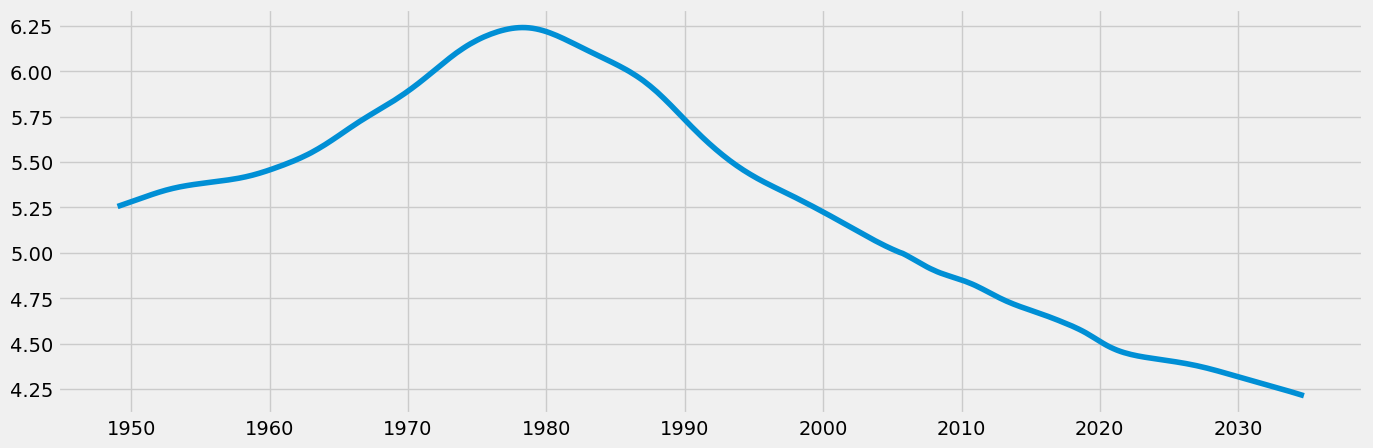

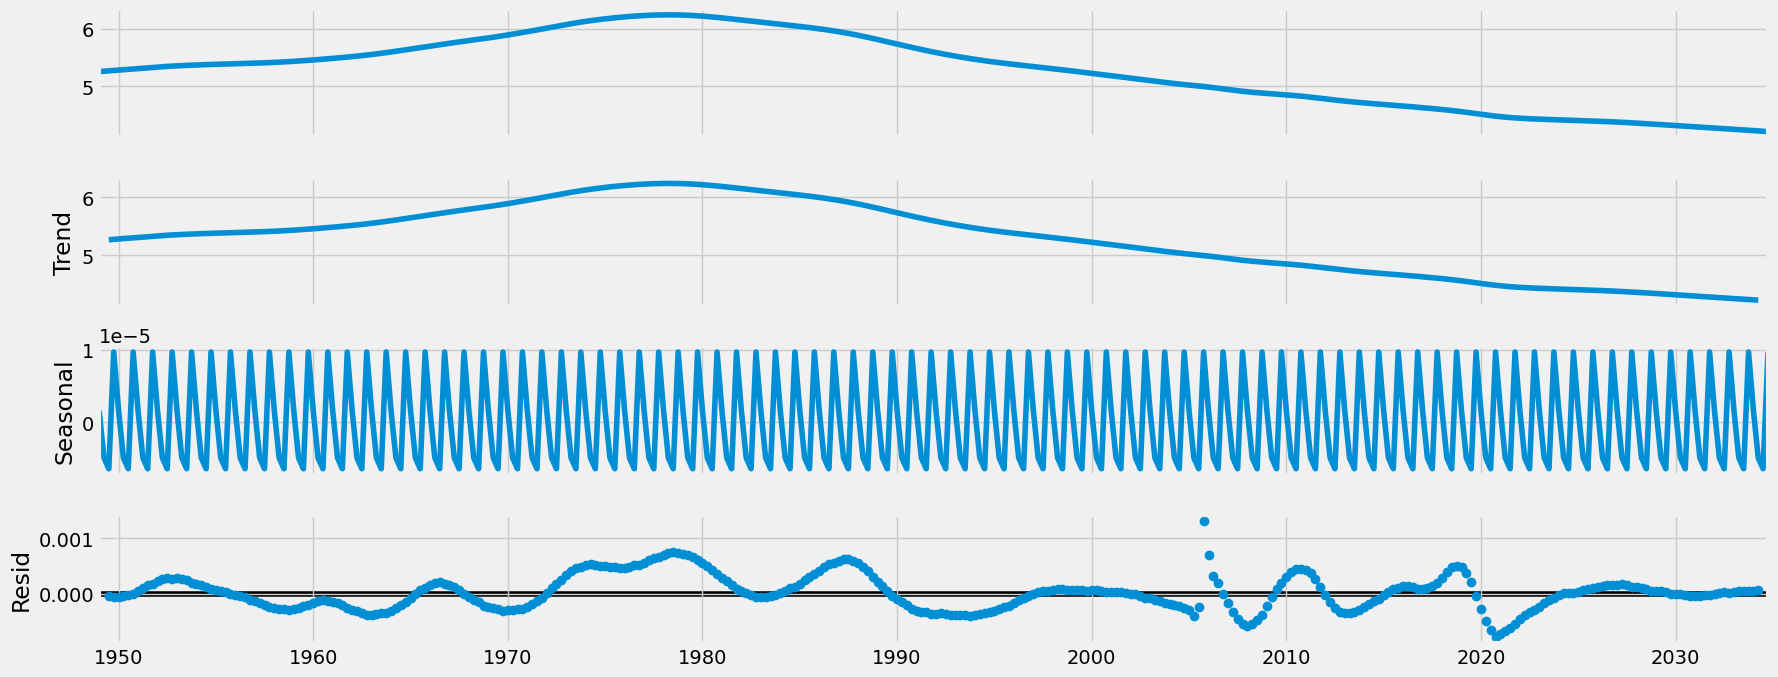

In [154]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7
# Plot the separate components
decomposition.plot()
plt.show()

- The unemployment rate shows an upward trend before stabilizing in 1980, followed by a decline in the subsequent years.

#### Testing for Stationary

In [155]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(data_sub['unemployment_rate'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -1.241460
p-value                          0.655511
Number of Lags Used              7.000000
Number of Observations Used    336.000000
Critical Value (1%)             -3.449963
Critical Value (5%)             -2.870181
Critical Value (10%)            -2.571373
dtype: float64


**The results of the Dickey-Fuller stationarity test suggest that the time series is non-stationary. The test statistic of -1.241460 exceeds the critical values at all significance levels (1%, 5%, and 10%), and the p-value of 0.655511 is greater than 0.05, leading to a failure to reject the null hypothesis of non-stationarity. Given the presence of an upward trend and seasonality, further transformations, such as differencing, may be necessary to achieve stationarity before applying time series models.**

In [160]:
# Stationarize the data by using the differencing technique
data_diff = data_sub - data_sub.shift(1)

# Remove any mising values as a result of the differencing
data_diff.dropna(inplace=True)

In [161]:
data_diff.head()

unemployment_rate
datetime                     
1949-04-01           0.006463
1949-07-01           0.006497
1949-10-01           0.006551
1950-01-01           0.006618
1950-04-01           0.006684

In [162]:
# Plot the time series to see what the effect of the differencing
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(data_diff)

In [164]:
# Recheck for stationarity by running another Dickey_Fuller test
dickey_fuller(data_diff['unemployment_rate'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -1.576537
p-value                          0.495368
Number of Lags Used              6.000000
Number of Observations Used    336.000000
Critical Value (1%)             -3.449963
Critical Value (5%)             -2.870181
Critical Value (10%)            -2.571373
dtype: float64


**The Dickey-Fuller stationarity test results indicate that the time series is non-stationary. The test statistic (-1.576537) is higher than the critical values at all significance levels, and the p-value (0.495368) exceeds 0.05, failing to reject the null hypothesis. Therefore, further transformations may be required to achieve stationarity.**

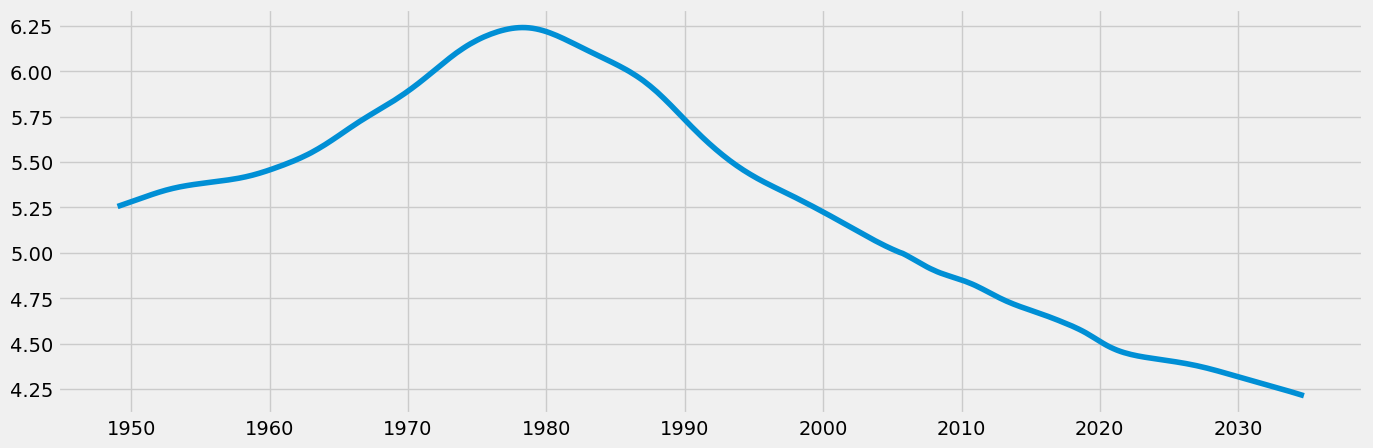

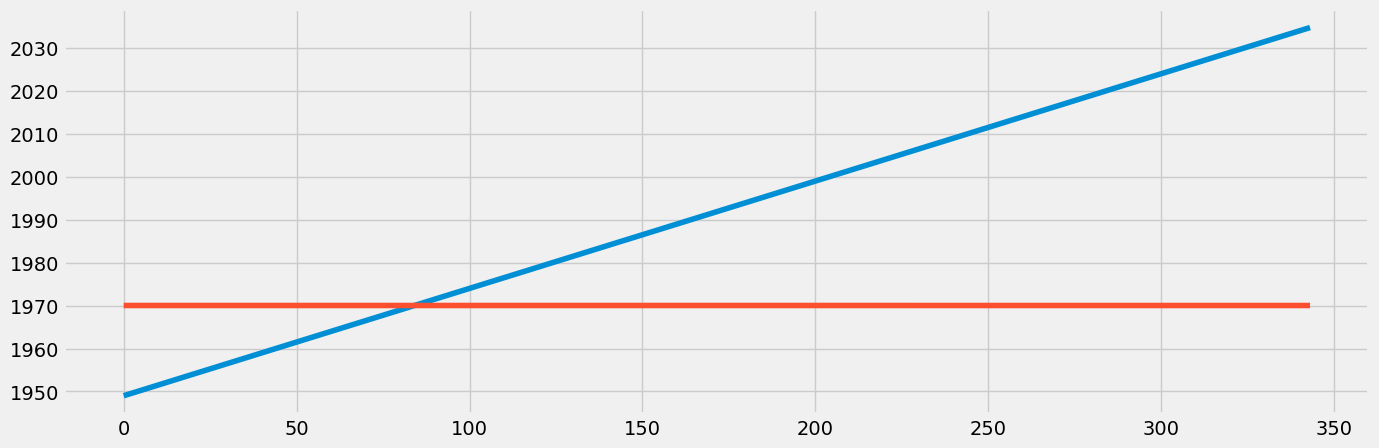

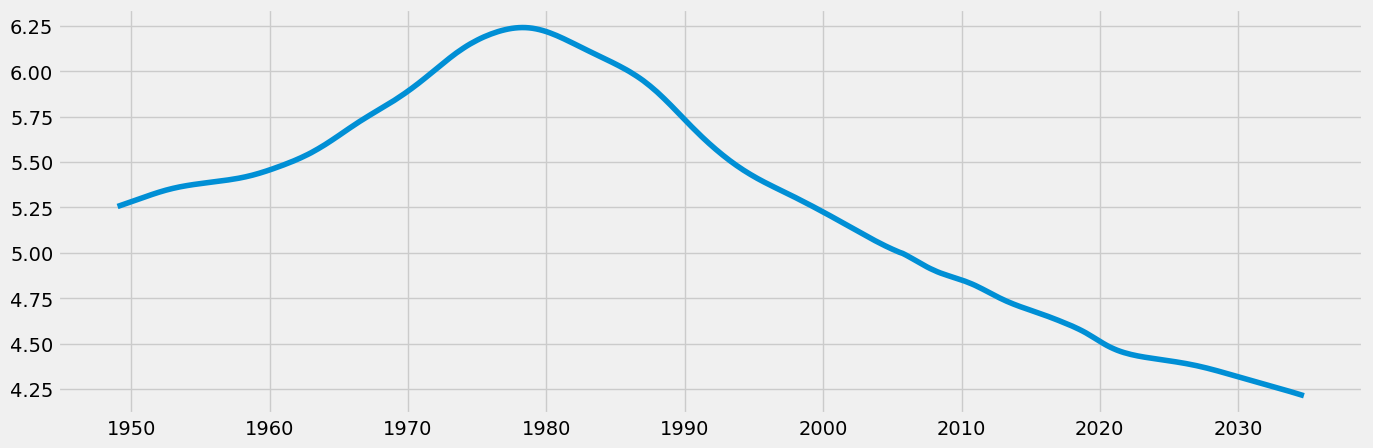

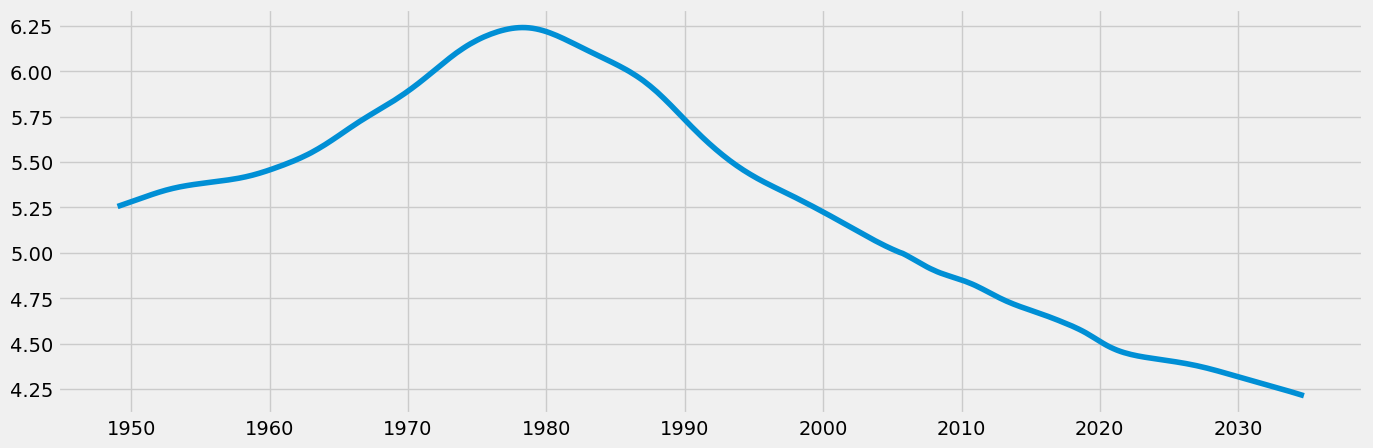

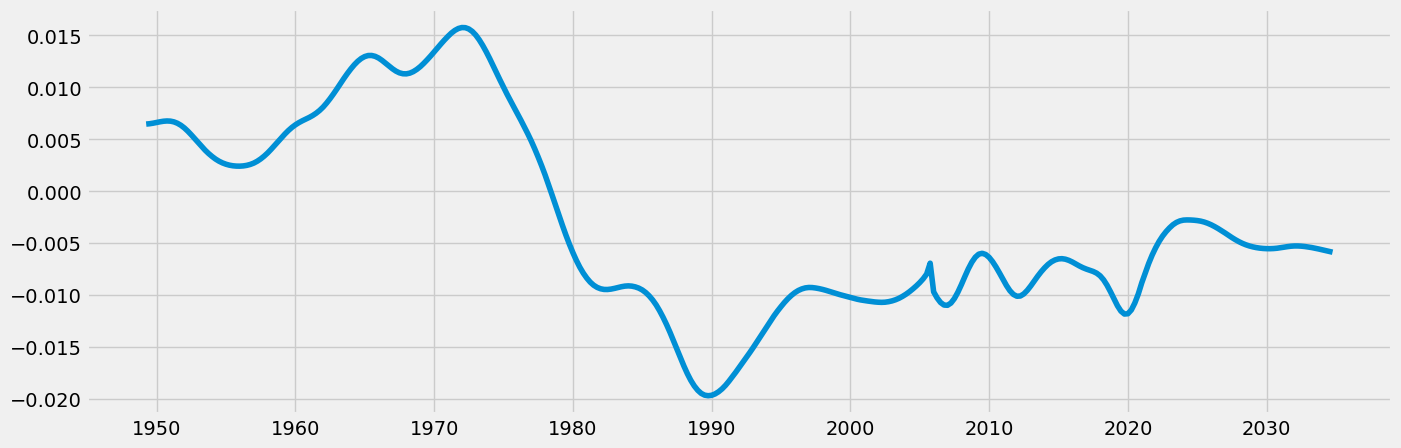

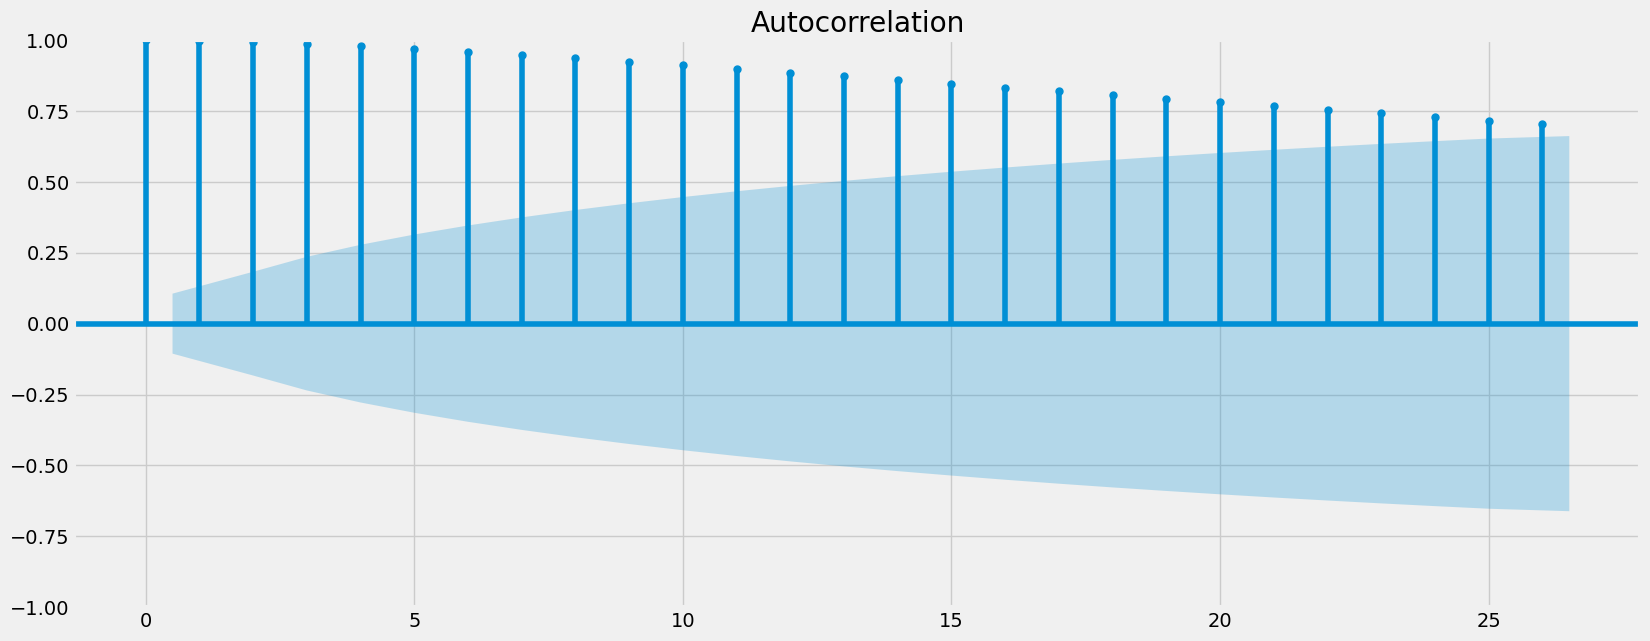

In [101]:
# Check the data's autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_diff)
plt.show()